# CAR PRICE PREDICTION

Analysis By - DHARVI

Problem - Statement :- <br>A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

Objectives :-<br>
- Which variables are significant in predicting the price of a car<br>
- How well those variables describe the price of a car

In [572]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [573]:
#import necessary tools


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler
# figure size in inches
rcParams['figure.figsize'] = 20,8

### DATA LOADING AND UNDERSTANDING

In [574]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [575]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [576]:
cars.shape

(205, 26)

##### INFERENCE : There are total 26 columns and each column has 205 non-null observations
<hr>

### DATA PREPARATION 

- We are given a column CarName which is of the form car-name car-model 
    - We can split the carName and work only with car-name as independent variable

In [577]:
cars['CarName'] = cars['CarName'].apply(lambda x: x.split(' ')[0])
cars['CarName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181        toyouta
182      vokswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189             vw
190             vw
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

##### OBSERVATION:
- some car-names are misspelled eg. toyota is misspelled as toyouta
    - we have to correct these misspelled names

In [578]:
# to find which car-names are misspelled we can find unique values in this column

cars['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### we can see that :
  - mazda is misspelled as maxda
  - nissan is Nissan
  - porsche is porcshce
  - toyota is toyouta
  - volkswagen is vokswagen and vw

In [579]:
# we can replace the above wrong values with correct one
cars['CarName'].replace('maxda','mazda',inplace=True)
cars['CarName'].replace('Nissan','nissan',inplace=True)
cars['CarName'].replace('porcshce','porsche',inplace=True)
cars['CarName'].replace('toyouta','toyota',inplace=True)
cars['CarName'].replace('vokswagen','volkswagen',inplace=True)
cars['CarName'].replace('vw','volkswagen',inplace=True)

# checking unique values again
cars['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)


### VISUALISING DATA

In [580]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### Since we have to predict carPrice we consider 'price' as our TARGET variable and we have to find how other variables are related to 'price' 

## UNIVARIATE ANALYSIS

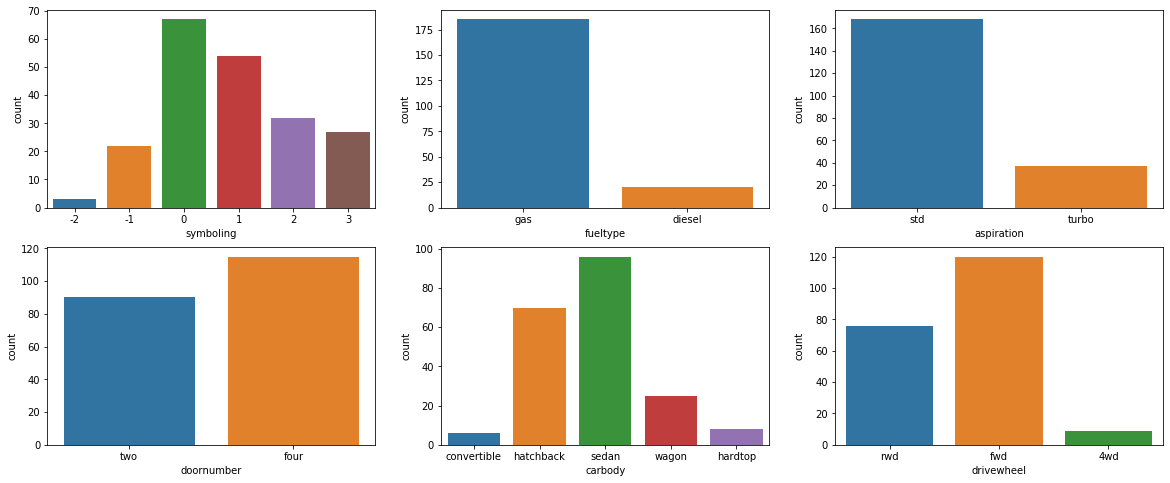

In [581]:
plt.subplot(2,3,1)
sns.countplot(x = 'symboling', data = cars)


plt.subplot(2,3,2)
sns.countplot(x = 'fueltype', data = cars)


plt.subplot(2,3,3)
sns.countplot(x = 'aspiration', data = cars)



plt.subplot(2,3,4)
sns.countplot(x = 'doornumber', data = cars)


plt.subplot(2,3,5)
sns.countplot(x = 'carbody', data = cars)



plt.subplot(2,3,6)
sns.countplot(x = 'drivewheel', data = cars)
plt.show()

#### INFERENCE:
         - symboling 0 and 1 vehicles are sold more
         - gas fueltype vehicles are sold more
         - std aspiration vehicles are sold more
         - four door vehicles are sold more
         - sedan is sold more followed by hatchback
         - fwd drivewheel vehicles are sold more

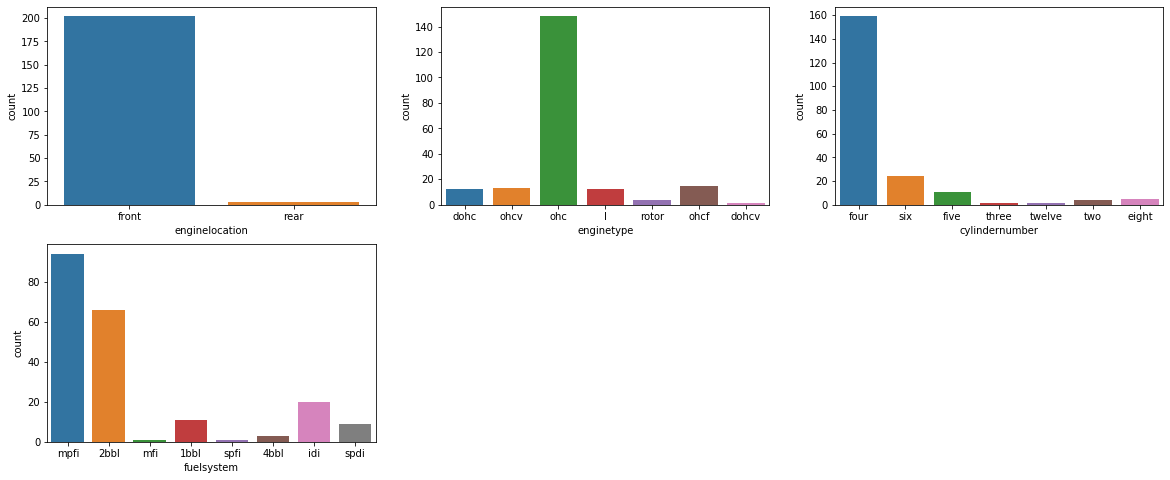

In [582]:

plt.subplot(2,3,1)
sns.countplot(x = 'enginelocation', data = cars)


plt.subplot(2,3,2)
sns.countplot(x = 'enginetype', data = cars)



plt.subplot(2,3,3)
sns.countplot(x = 'cylindernumber', data = cars)


plt.subplot(2,3,4)
sns.countplot(x = 'fuelsystem', data = cars)

plt.show()

#### INFERENCE:
        - front engine location vehicles are sold more
        - ohc enginetype vehicles are sold more
        - four cylinder vehicles are sold more
        - mpfi followed by 2bbi vehicles are sold more

## BIVARIATE ANALYSIS

#### Visualising numeric variables 

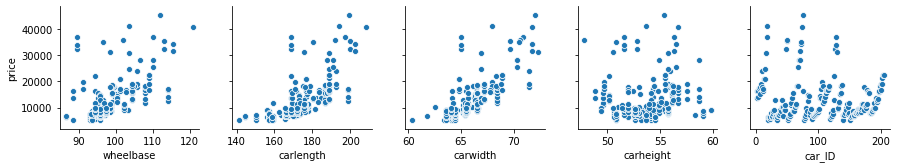

In [583]:
sns.pairplot(cars, x_vars = ['wheelbase','carlength','carwidth','carheight','car_ID'], y_vars = 'price')

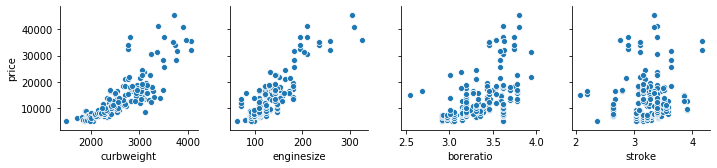

In [584]:
sns.pairplot(cars, x_vars = ['curbweight','enginesize','boreratio','stroke'], y_vars = 'price')

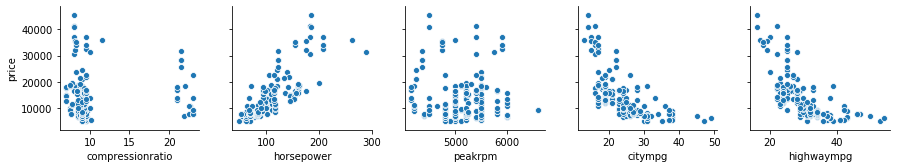

In [585]:
sns.pairplot(cars, x_vars = ['compressionratio','horsepower','peakrpm','citympg','highwaympg'], y_vars = 'price')

##### INFERENCE : From above 14 plots we see that some variables have a linear relation with price as follows : <br>
##### positive correlation with price 
       - wheelbase
       - carlength
       - carwidth
       - curbweight
       - enginesize
       - boreratio
       - horsepower
       
##### negative correlation with price
       - citympg
       - highwaympg

##### no significant correlation with price
       - carheight
       - car_ID
       - stroke
       - compressionratio
       - peakrpm

In [586]:
cars = cars.drop(['carheight','car_ID','stroke','compressionratio','peakrpm'],axis = 1)

#### Visualising Categorical variables

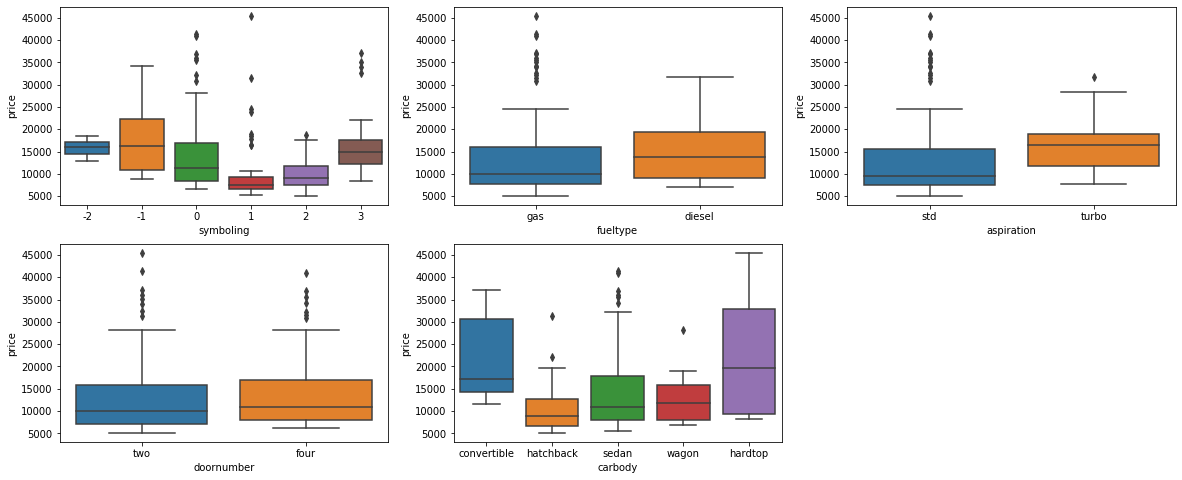

In [587]:
plt.subplot(2,3,1)
sns.boxplot(x='symboling',y='price',data = cars)

plt.subplot(2,3,2)
sns.boxplot(x='fueltype',y='price',data = cars)

plt.subplot(2,3,3)
sns.boxplot(x='aspiration',y='price',data = cars)

plt.subplot(2,3,4)
sns.boxplot(x='doornumber',y='price',data = cars)

plt.subplot(2,3,5)
sns.boxplot(x='carbody',y='price',data = cars)


plt.show()

#### INFERENCE : 
        - symboling : as the symboling reduces to -1 and -2 car prices increase
        - fueltype : prices of diesel vehicles are higher than gas vehicles
        - aspiration : turbo has higher price
        - doornumber : vehicles with 4 doors have slightly higher price than those with 2 doors
        - carbody : hardtop vehicles are highly priced

In [588]:
## doornumber seems not significant because both categories have almost same price hence can be dropped
cars = cars.drop('doornumber',axis = 1)

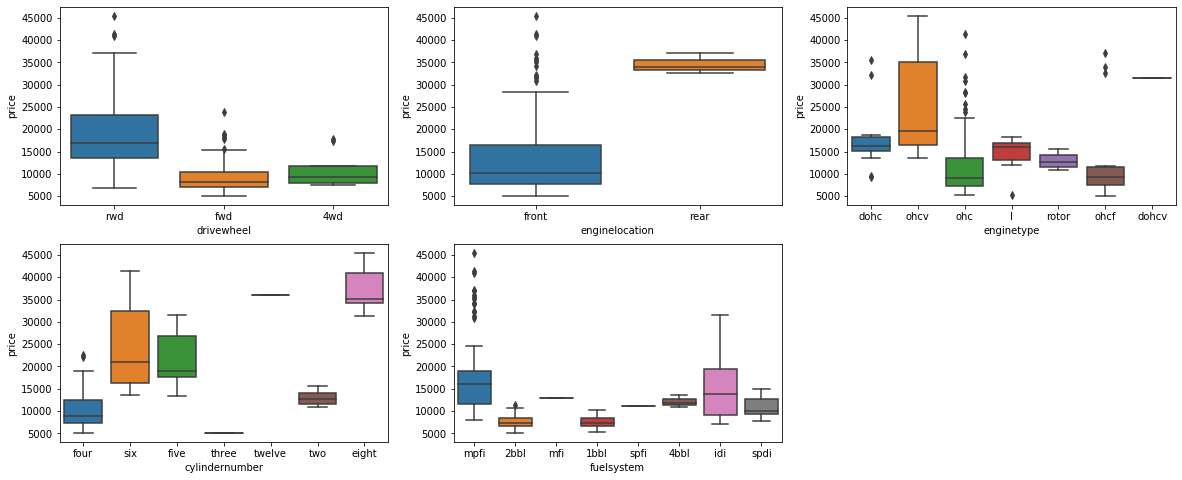

In [589]:

plt.subplot(2,3,1)
sns.boxplot(x='drivewheel',y='price',data = cars)

plt.subplot(2,3,2)
sns.boxplot(x='enginelocation',y='price',data = cars)

plt.subplot(2,3,3)
sns.boxplot(x='enginetype',y='price',data = cars)

plt.subplot(2,3,4)
sns.boxplot(x='cylindernumber',y='price',data = cars)

plt.subplot(2,3,5)
sns.boxplot(x='fuelsystem',y='price',data = cars)
plt.show()

INFERENCE :¶
    - drivewheel : rwd has higher price
    - enginelocation : there are less entries with rear engine location but there prices are high
    - enginetype : ohcv has higher price
    - cylindernumber : six to eight cylinder vehicles have higher price
    - fuelsystem : mpfi has very highly priced vehicles and idi is second to it

##### OBSRVATIONS : FEATURES OF A HIGHLY PRICED VEHICLE <br>
#### A highly priced vehicle has either idi or mpfi fuelsystem with rear engine and ohcv enginetype with a rwd drivewheel with six to eight cylinders with a hardtop body and turbo aspiration with high safety symboling no. of either -1 or -2
            
<hr>

### DERIVING NEW FEATURES

In [590]:
print(cars['price'].max())
print(cars['price'].min())

45400.0
5118.0


In [591]:
# We can use companyName to predict which cars cost low medium or high

cars['price'] = cars['price'].astype('int')
cars_price = cars.copy()
cars_table = cars_price.groupby(['CarName'])['price'].mean()
cars_table

CarName
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [592]:
cars_price = cars_price.merge(cars_table.reset_index(), how='left',on='CarName')
cars_price.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price_x,price_y
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,3.47,111,21,27,13495,15498.333333
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,3.47,111,21,27,16500,15498.333333
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,six,152,mpfi,2.68,154,19,26,16500,15498.333333
3,2,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,ohc,four,109,mpfi,3.19,102,24,30,13950,17859.142857
4,2,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,ohc,five,136,mpfi,3.19,115,18,22,17450,17859.142857


In [593]:
bins = [0,10000,20000,45000]
cars_bin=['low','medium','high'] # budget values
cars['cars_range'] = pd.cut(cars_price['price_y'],bins,right=False,labels=cars_bin)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling         205 non-null int64
CarName           205 non-null object
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
enginelocation    205 non-null object
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
fuelsystem        205 non-null object
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
price             205 non-null int64
cars_range        205 non-null category
dtypes: category(1), float64(4), int64(7), object(9)
memory usage: 32.4+ KB


In [594]:
cars['cars_range'].head()

0    medium
1    medium
2    medium
3    medium
4    medium
Name: cars_range, dtype: category
Categories (3, object): [low < medium < high]

In [595]:
cars.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,cars_range
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,3.47,111,21,27,13495,medium
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,3.47,111,21,27,16500,medium
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,six,152,mpfi,2.68,154,19,26,16500,medium
3,2,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,ohc,four,109,mpfi,3.19,102,24,30,13950,medium
4,2,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,ohc,five,136,mpfi,3.19,115,18,22,17450,medium


#### DUMMY VARIABLE DERIVATION

In [596]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling         205 non-null int64
CarName           205 non-null object
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
enginelocation    205 non-null object
wheelbase         205 non-null float64
carlength         205 non-null float64
carwidth          205 non-null float64
curbweight        205 non-null int64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
fuelsystem        205 non-null object
boreratio         205 non-null float64
horsepower        205 non-null int64
citympg           205 non-null int64
highwaympg        205 non-null int64
price             205 non-null int64
cars_range        205 non-null category
dtypes: category(1), float64(4), int64(7), object(9)
memory usage: 32.4+ KB


In [597]:
fueltype_val = pd.get_dummies(cars['fueltype'], drop_first = True)
carbody_val = pd.get_dummies(cars['carbody'], drop_first = True)
aspiration_val = pd.get_dummies(cars['aspiration'], drop_first = True)
symboling_val = pd.get_dummies(cars['symboling'], drop_first = True)
cars_range_val = pd.get_dummies(cars['cars_range'], drop_first = True)
cylindernumber_val = pd.get_dummies(cars['cylindernumber'], drop_first = True)
enginelocation_val = pd.get_dummies(cars['enginelocation'], drop_first = True)
fuelsystem_val = pd.get_dummies(cars['fuelsystem'], drop_first = True)
enginetype_val = pd.get_dummies(cars['enginetype'], drop_first = True)
drivewheel_val = pd.get_dummies(cars['drivewheel'], drop_first = True)

In [598]:
drop_cols = ['fueltype','carbody','aspiration','symboling','cars_range','cylindernumber','enginelocation','CarName','fuelsystem','enginetype','drivewheel']
cars = cars.drop(drop_cols, axis = 1)

In [599]:
cars.shape

(205, 10)

In [600]:
# concatinating dummies
cars = pd.concat([cars,fueltype_val], axis = 1)
cars = pd.concat([cars,carbody_val], axis = 1)
cars = pd.concat([cars,aspiration_val], axis = 1)
cars= pd.concat([cars,symboling_val], axis = 1)
cars = pd.concat([cars,cars_range_val], axis = 1)
cars= pd.concat([cars,cylindernumber_val], axis = 1)
cars = pd.concat([cars,enginelocation_val], axis = 1)
cars = pd.concat([cars,fuelsystem_val], axis = 1)
cars = pd.concat([cars,enginetype_val], axis = 1)
cars = pd.concat([cars,drivewheel_val], axis = 1)

In [601]:
cars.shape

(205, 45)

In [602]:
cars.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495,...,0,0,0,0,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500,...,0,0,0,0,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500,...,0,0,0,0,0,0,1,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950,...,0,0,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450,...,0,0,0,0,1,0,0,0,0,0


### TRAINING THE MODEL

In [603]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [604]:
df_train, df_test = train_test_split(cars,train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(143, 45)
(62, 45)


### SCALING THE DATA

In [605]:
scaler = MinMaxScaler()
# scale numeric variables
variable_list = ['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']
df_train[variable_list] = scaler.fit_transform(df_train[variable_list])

In [606]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.344211,0.374976,0.219309,...,0.041958,0.0,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.594406,0.349650
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.186165,0.188477,0.215682,...,0.201198,0.0,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.492733,0.478536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.166667,0.216216,0.067298,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.333333,0.378378,0.140343,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.500000,0.527027,0.313479,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [607]:
# now all numeric variables lie in between 0 and 1 (included both)

In [608]:
# X_train, y_train
y_train = df_train.pop('price')
X_train = df_train
df_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,gas,...,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,fwd,rwd
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.500000,0.567568,1,...,0,0,0,0,1,0,0,0,1,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.166667,0.270270,1,...,0,0,0,0,1,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.361111,0.324324,1,...,0,0,0,0,0,0,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.222222,0.270270,1,...,0,0,0,0,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.111111,0.135135,1,...,0,0,0,0,1,0,0,0,0,1
190,0.272414,0.400000,0.308333,0.284329,0.181132,0.404762,0.175000,0.305556,0.324324,1,...,0,0,0,0,1,0,0,0,1,0
96,0.272414,0.393496,0.291667,0.187355,0.135849,0.373016,0.087500,0.500000,0.540541,1,...,0,0,0,0,1,0,0,0,1,0
177,0.544828,0.560976,0.516667,0.376261,0.230189,0.500000,0.183333,0.388889,0.405405,1,...,0,0,0,0,1,0,0,0,1,0
181,0.617241,0.759350,0.516667,0.645074,0.377358,0.468254,0.450000,0.166667,0.189189,1,...,0,0,0,0,0,0,0,0,0,1
97,0.272414,0.473171,0.291667,0.212956,0.135849,0.373016,0.087500,0.500000,0.540541,1,...,0,0,0,0,1,0,0,0,1,0


In [609]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [610]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 4),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 24),
 ('horsepower', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 23),
 ('gas', False, 31),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', False, 3),
 ('wagon', True, 1),
 ('turbo', False, 28),
 (-1, False, 15),
 (0, False, 13),
 (1, False, 12),
 (2, False, 11),
 (3, False, 14),
 ('medium', False, 22),
 ('high', True, 1),
 ('five', False, 6),
 ('four', False, 5),
 ('six', False, 8),
 ('three', False, 16),
 ('twelve', False, 7),
 ('two', False, 27),
 ('rear', True, 1),
 ('2bbl', False, 33),
 ('4bbl', False, 29),
 ('idi', False, 32),
 ('mfi', False, 35),
 ('mpfi', False, 30),
 ('spdi', False, 25),
 ('spfi', False, 34),
 ('dohcv', True, 1),
 ('l', False, 17),
 ('ohc', False, 9),
 ('ohcf', False, 10),
 ('ohcv', False, 21),
 ('rotor', False, 19),
 ('fwd', False, 26),
 ('rwd', False, 18)]

In [611]:
#cols selected for rfe
X_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg',
       'hatchback', 'wagon', 'high', 'rear', 'dohcv'],
      dtype='object')

## BUILDING MODELS USING STATSMODEL API

##### model 1

In [612]:
# building models using statsmodel for better stats
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [613]:
X_train_lm = sm.add_constant(X_train_rfe)

In [614]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [615]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     170.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.97e-70
Time:                        22:47:35   Log-Likelihood:                 205.38
No. Observations:                 143   AIC:                            -388.8
Df Residuals:                     132   BIC:                            -356.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1480      0.037     -3.973      0.0

In [616]:
# p-value of enginesize seem very high than the standard 0.05 hence we can drop it
X_train_new = X_train_lm.drop(["enginesize"], axis = 1)

##### model 2

In [617]:
X_train_lm = sm.add_constant(X_train_new)

In [618]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [619]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.4
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           4.95e-71
Time:                        22:47:35   Log-Likelihood:                 204.01
No. Observations:                 143   AIC:                            -388.0
Df Residuals:                     133   BIC:                            -358.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1292      0.036     -3.632      0.0

In [620]:
# citympg has p-value > 0.05
X_train_new = X_train_lm.drop(["citympg"], axis = 1)

##### model 3

In [621]:
X_train_lm = sm.add_constant(X_train_new)

In [622]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [623]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     210.6
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.59e-72
Time:                        22:47:35   Log-Likelihood:                 203.43
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     134   BIC:                            -362.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0968      0.017     -5.735      0.0

In [624]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.23
2,curbweight,8.32
1,carwidth,4.97
3,horsepower,3.98
6,high,1.70
8,dohcv,1.50
4,hatchback,1.29
5,wagon,1.27
7,rear,1.23


##### model 4

In [625]:
# drop curbweight
X_train_new = X_train_lm.drop(["curbweight"], axis = 1)

In [626]:
X_train_lm = sm.add_constant(X_train_new)

In [627]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [628]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     209.6
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.90e-69
Time:                        22:47:36   Log-Likelihood:                 193.83
No. Observations:                 143   AIC:                            -371.7
Df Residuals:                     135   BIC:                            -348.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1005      0.018     -5.590      0.0

In [629]:
# drop wagon because p-value > 0.05
X_train_new = X_train_lm.drop(["wagon"], axis = 1)

##### model 5

In [630]:
X_train_lm = sm.add_constant(X_train_new)

In [631]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [632]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     244.4
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.91e-70
Time:                        22:47:36   Log-Likelihood:                 193.31
No. Observations:                 143   AIC:                            -372.6
Df Residuals:                     136   BIC:                            -351.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1040      0.018     -5.904      0.0

In [633]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.77
2,horsepower,2.63
1,carwidth,2.31
4,high,1.58
6,dohcv,1.22
5,rear,1.20
3,hatchback,1.14


In [634]:
#check if values change for prob F-stats and R2 and adjusted R2 by dropping variables
# now highest p-value is for rear , we will drop it
X_train_new = X_train_lm.drop(["rear"], axis = 1)


##### model 6

In [635]:
X_train_lm = sm.add_constant(X_train_new)

In [636]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [637]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.57e-70
Time:                        22:47:37   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [638]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
4,high,1.53
5,dohcv,1.21
3,hatchback,1.13


In [639]:
# we observe that prob f-statistic has reduced now based on further analysis we see that std err for dohcv is high 
#so lets drop it and check the model
# std err tells how wrong is our model
    
X_train_new = X_train_lm.drop(["dohcv"], axis = 1)

##### model 7

In [640]:
X_train_lm = sm.add_constant(X_train_new)

In [641]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [642]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.04e-67
Time:                        22:47:39   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [643]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.04
2,horsepower,2.22
1,carwidth,2.08
4,high,1.53
3,hatchback,1.10


In [644]:
# now lets remove horsepower and see the affects
X_train_temp['horsepower'] = X_train_lm['horsepower']
X_train_new = X_train_lm.drop(["horsepower"], axis = 1)

##### model 8

In [645]:
X_train_lm = sm.add_constant(X_train_new)

In [646]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [647]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     258.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.26e-56
Time:                        22:47:43   Log-Likelihood:                 151.59
No. Observations:                 143   AIC:                            -295.2
Df Residuals:                     139   BIC:                            -283.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1018      0.022     -4.553      0.0

In [651]:
# now we observe that R2 and adjusted R2 have reduced a lot and also p - value for hatchback increased so we will not
# discard horsepower
X_train_lm['horsepower'] = X_train_temp
X_train_lm.head()

,const,carwidth,hatchback,high,horsepower
122,1.0,0.291667,0,0,0.083333
125,1.0,0.666667,1,1,0.395833
166,1.0,0.308333,1,0,0.266667
1,1.0,0.316667,0,0,0.262500
199,1.0,0.575000,0,0,0.475000


#### FINAL MODEL

In [652]:
X_train_new = X_train_lm
X_train_new.head()

,const,carwidth,hatchback,high,horsepower
122,1.0,0.291667,0,0,0.083333
125,1.0,0.666667,1,1,0.395833
166,1.0,0.308333,1,0,0.266667
1,1.0,0.316667,0,0,0.262500
199,1.0,0.575000,0,0,0.475000


In [653]:
X_train_lm = sm.add_constant(X_train_new)

In [654]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [655]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.04e-67
Time:                        22:52:35   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

<hr>

### RESIDUAL ANALYSIS

Text(0.5, 0, 'Errors')

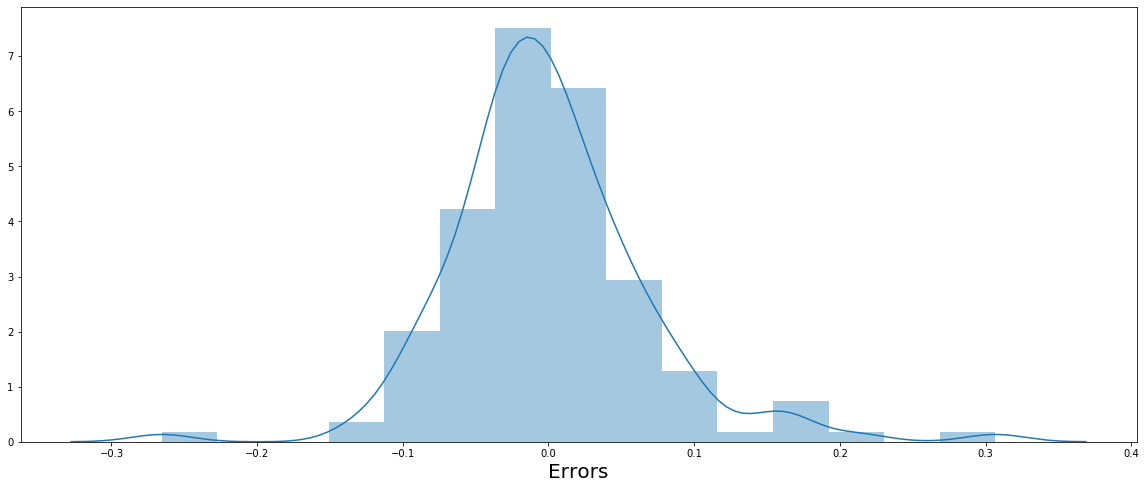

In [656]:
lm = sm.OLS(y_train,X_train_new).fit()
y_predict_price = lm.predict(X_train_new)
sns.distplot((y_train - y_predict_price), bins = 15) 
plt.xlabel('Errors', fontsize = 20)   

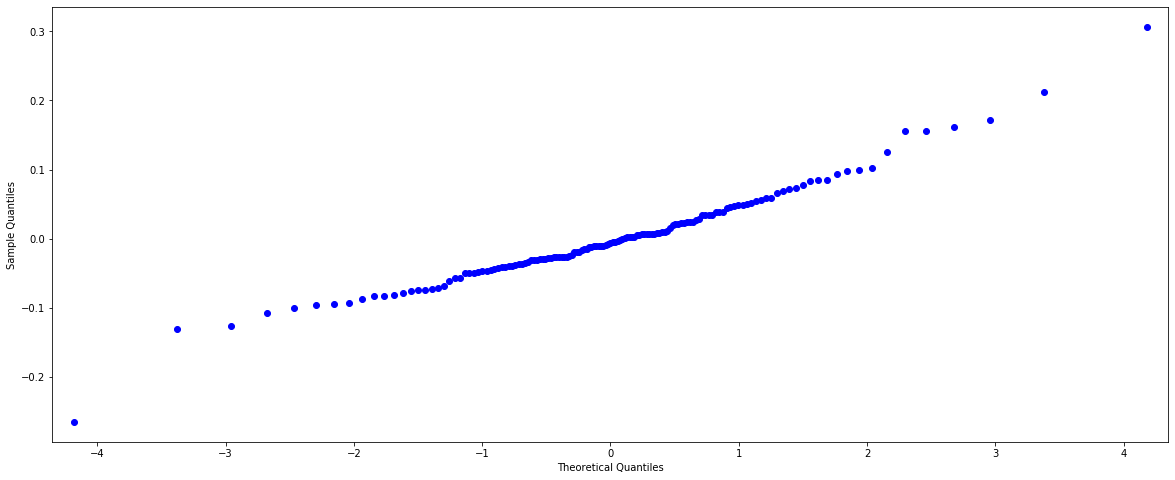

In [657]:
## error terms are normally distributed centered around 0.0
res = lm.resid
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, distargs=(4,))
plt.show()

In [658]:
#The mean absolute error can be defined as
np.mean(np.abs(y_train - y_predict_price)) # approx zero

0.04849118001156064

In [659]:
#The variance of absolute error 
np.var(np.abs(y_train - y_predict_price))  # approx zero

0.002301672116041666

In [660]:
#the variance of error is
np.var((y_train - y_predict_price))  # approx zero

0.004653066654955244

#### INFERENCE : 
        - Error terms are normally distributed

### GETTING PREDICTIONS

In [661]:
# scale numeric variables
variable_list = ['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']
df_test[variable_list] = scaler.transform(df_test[variable_list])

In [662]:
y_test = df_test.pop('price')
X_test = df_test

In [663]:
X_train_new = X_train_new.drop('const',axis = 1)

In [664]:
X_test_new = X_test[X_train_new.columns]

In [665]:
X_test_new = sm.add_constant(X_test_new)

In [666]:
#predicting values
y_pred = lm.predict(X_test_new)

### EVALUATING THE MODEL

Text(0, 0.5, 'y_pred')

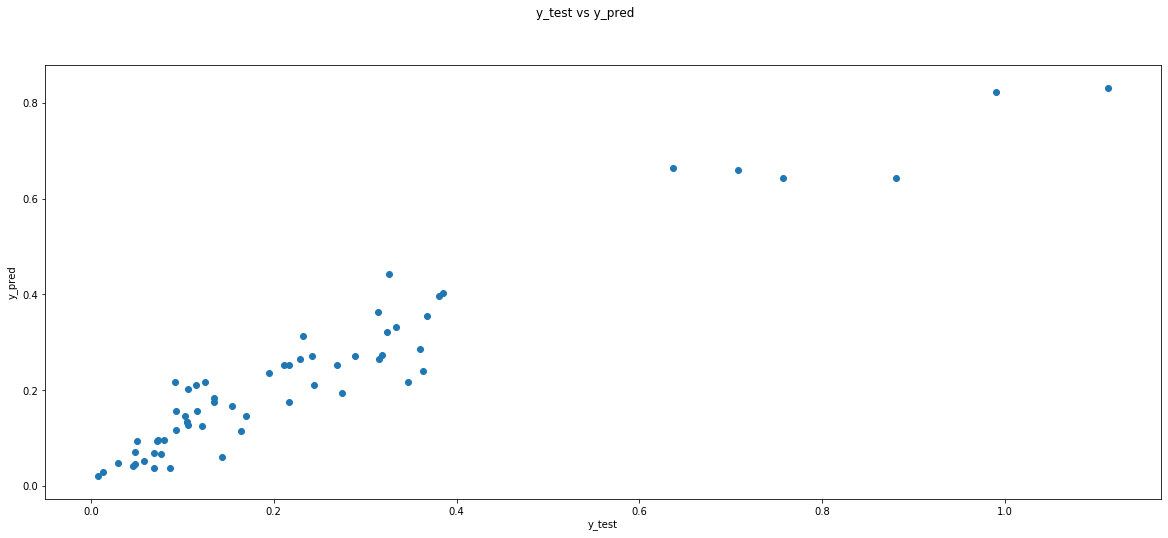

In [667]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0, 0.5, 'y_pred')

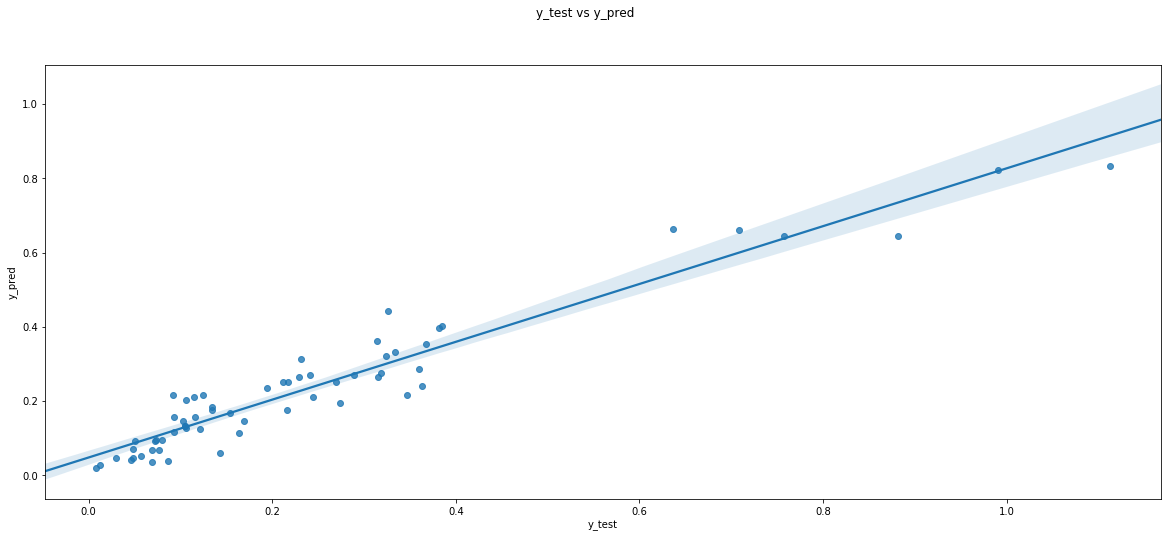

In [668]:
# good linear relation
fig = plt.figure()
sns.regplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [669]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.04e-67
Time:                        22:52:58   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

##### OBSERVATION :-
        - predicted values have similar R^2 and adjusted R^2 as that of train model
        - p-values are significant 
       Hence the overall model is good

### INFERENCE :
price = 0.3957 x carwidth +0.4402 x horsepower - 0.0414 x hatchback + 0.2794 x high -0.0824

In [671]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8986673380351831

#### Observation :
    - approx 89% of variance is explained by this model 

<hr>